In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.classification import *

# Get Data

In [2]:
train = pd.read_csv("Data/train.csv", index_col = 0)
train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,1938.300,8.6331,4.0607,26.8670,-1.180,10961.00,1.5397,135.3200,-1.49650,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.75050,18509.0,146820.0,-0.000276,1.090600e+16,1705.400,414.29,3.5392,1888.0,0.968930,18.3880,-0.001583,7.7059,5.9325,0.025693,4.5604,0.61122,10.7950,0.341930,0.235010,NaN,5237.70,1.29610,163.66,0.403780,0.188600,-0.001446,-0.35416,6.6432,0.30534,0.514020,1.907300e+09,29.861,0.965010,1797.2,72.178,108.6200,1.9799,1.2907,0.99519,1.3228,827.340,7.779900e+14,4.129900e+10,0.006994,6.9835,43956.0,1978.2,5.5084,-0.001081,6.1244,1.231800e+11,275.9200,5308500.0,1704.000,5.022400e+10,53.3980,-2.2012,6871.0,3.8862,-0.00558,5252.100,166.690,1.60740,0.66534,7768.900,0.99662,1.125700e+11,2.2432,0.934160,0.65056,94569.0,21.471,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.284,6.1872,1.0419,4.6404,31.877,123620.00,1.3951,125.8100,1.19890,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.50330,238000.0,21440.0,-0.001344,3.079400e+16,229.100,844.82,1.4680,4726.5,0.915380,-1.5321,0.982600,7.1112,2.0797,0.042321,4.2523,0.41871,5.4499,0.012737,0.386470,7.3082,283.21,-0.92552,140.80,0.247390,-0.001656,-0.000975,-0.22629,2.4246,0.77147,0.011613,1.803700e+09,64.604,0.262650,4455.0,78.339,745.5100,2.9069,1.4826,1.00510,1.4974,84.446,3.505600e+15,2.242300e+09,0.896300,4.6749,17713.0,9003.1,-4.3546,0.254100,6.9191,1.832400e+11,9.6510,32800.0,1480.600,2.300600e+10,44.0510,205.6900,4295.3,13.3880,0.46843,754.610,83.233,1.18900,29.55000,7343.700,0.99815,4.877700e+13,1.2708,-0.000969,5.29520,6779.0,227.720,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,0.38164,1.230300e+09,0.25807,2.455600,NaN,26.873,7.5463,1.9967,1.9526,817.760,-2948.70,2.0054,1.6826,1.19680,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.13180,27940.0,862460.0,-0.002207,5.849100e+13,-897.840,NaN,1.3561,3063.4,0.086232,16.1060,0.001481,11.4760,5.3430,0.012162,4.1018,-0.88270,8.1228,-0.676690,0.337700,-1.0732,4097.00,13.45800,159.24,0.322300,0.560090,0.000455,-0.16083,3.5753,0.60970,0.028301,5.271300e+08,14.454,0.115490,14605.0,36.992,-9.6391,64.2670,NaN,0.99278,2.5891,430.400,-4.453500e+13,5.144900e+12,0.099591,6.5516,1887.5,43319.0,4.3931,0.260260,6.1052,1.013300e+11,357.2700,1476600.0,90.845,1.306200e+09,2.3731,391.3700,2965.3,NaN,0.49459,43.524,138.520,1.10790,0.91948,47.915,NaN,1.510500e+12,3.4663,0.560950,4.13090,95531.0,39.486,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,1.10960,1.223100e+09,0.30944,10.370000,-0.106260,533.840,7.8490,1.0379,8.0030,12.349,-195.28,2.5598,92.1420,0.63789,1054.900,-1.204100e+10,5.187300e+12,1475400.0,1.036500,1.1903,0.98941,301200.0,NaN,-0.000007,-9.299200e+13,-10.818,1020.30,2.9553,334

In [3]:
train.shape

(957919, 119)

# Train model

In [4]:
experiment = setup(data = train, target = 'claim', session_id=123)

,Description,Value
0,session_id,123
1,Target,claim
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(957919, 119)"
5,Missing Values,True
6,Numeric Features,118
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5_models = compare_models(n_select = 5, sort = 'AUC')

IntProgress(value=0, description='Processing: ', max=69)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:20:49
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6737,0.7181,0.5591,0.7234,0.6307,0.3470,0.3562,649.9130
ada,Ada Boost Classifier,0.5491,0.5698,0.5440,0.5481,0.5460,0.0983,0.0983,124.0330
rf,Random Forest Classifier,0.5448,0.5624,0.4962,0.5479,0.5208,0.0894,0.0898,235.4470
lda,Linear Discriminant Analysis,0.5286,0.5404,0.5102,0.5280,0.5190,0.0571,0.0571,23.2710
dt,Decision Tree Classifier,0.5116,0.5116,0.5095,0.5100,0.5098,0.0231,0.0231,42.0220
knn,K Neighbors Classifier,0.5068,0.5094,0.5062,0.5052,0.5057,0.0136,0.0136,15.9900
lr,Logistic Regression,0.5045,0.5074,0.4872,0.5030,0.4949,0.0089,0.0089,4.7740
nb,Naive Bayes,0.5016,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9490
svm,SVM - Linear Kernel,0.5015,0.0000,0.5379,0.4984,0.4864,0.0032,0.0030,49.1590
ridge,Ridge Classifier,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.1750


In [14]:
top5_models

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
            

In [ ]:
blended_models = blend_models(estimator_list = top5_models)

In [7]:
blended_models

VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             su...
                                                     min_s

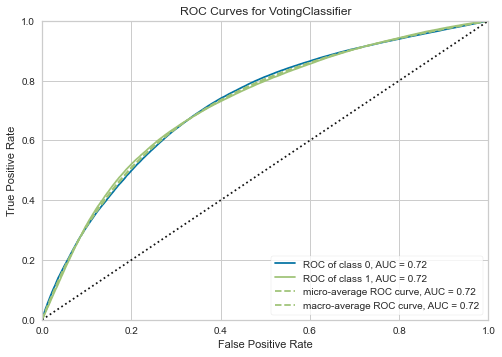

In [8]:
plot_model(blended_models, plot = 'auc')

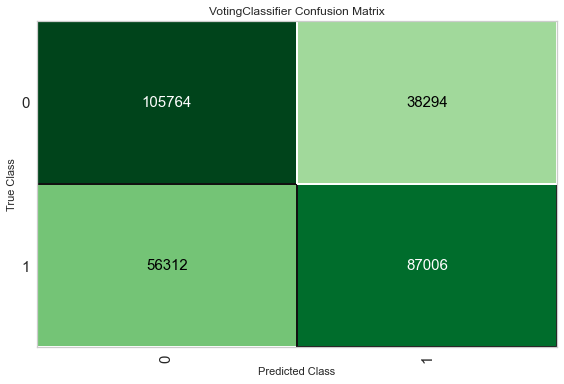

In [10]:
plot_model(blended_models, plot='confusion_matrix')

In [12]:
final_model = finalize_model(blended_models)

In [20]:
save_model(final_model,'Models/pycaret_top5_models_blend')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='claim',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                                                       min_samples_split=2,
                                                                       min_weight_fraction_leaf=0.0,
                                                                       n_estimato

# Make predictions on the test set

In [16]:
test_data = pd.read_csv("Data/test.csv")
sample_submission = pd.read_csv("Data/sample_solution.csv")

In [18]:
predictions = predict_model(final_model, data=test_data)

In [21]:
predictions.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f111,f112,f113,f114,f115,f116,f117,f118,Label,Score
0,957919,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,...,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357,1,0.5151
1,957920,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,...,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125,0,0.5601
2,957921,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,...,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797,0,0.5213
3,957922,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,...,1.5199,-0.011633,1.3840,26849.0,1.1490,2.138800e+17,6173.3,0.32910,0,0.5321
4,957923,0.079947,-0.006919,10574.00,0.34845,0.45008,-1.84200,3027.00,428150.0,9.291500e+11,...,3.7387,0.757080,-4.9405,50336.0,1.2488,2.151300e+17,2250.1,0.33796,0,0.5096


In [24]:
sample_submission.claim = predictions.Score.values

In [27]:
sample_submission.to_csv("Submissions/pycaret_top5_models_blend.csv", index = False)